# MediaPipe Holistic

In [1]:
! pip install mediapipe opencv-python

  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)


In [1]:
import mediapipe as mp
import cv2

### 1. Real Webcam Feed

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Real Webcam Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
cap.release()
cv2.destroyAllWindows()

### 2. Make Detections from Feed

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
        
        # Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [13]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

### 3. Apply Styling

In [9]:
mp_drawing.draw_landmarks??

In [10]:
mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)

DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2)

In [11]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

### 4. input img

0 ../data/pre/1_front/0/0_0.jpg


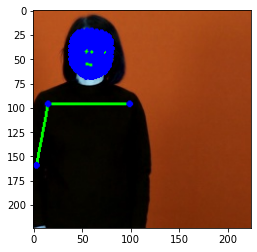

In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

file_list = ['../data/pre/1_front/0/0_0.jpg']
with mp_holistic.Holistic(static_image_mode=True) as holistic:
    for idx, file in enumerate(file_list):
        print(idx, file)
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    cv2.imwrite('result' + str(idx) + '.png', annotated_image)
    plt.imshow(annotated_image)

In [29]:
path = '../data/pre/1_front/0/0_0.jpg'

image_pil = Image.open(path)
image = np.array(image_pil)

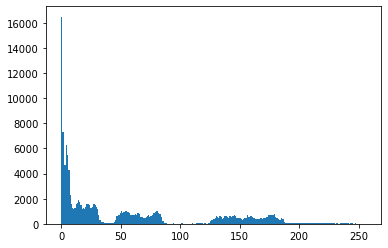

In [30]:
image.shape


#이미지 range 확인
np.min(image), np.max(image)


#이미지 시각화
plt.hist(image.ravel(),256,[0,256])
plt.show()

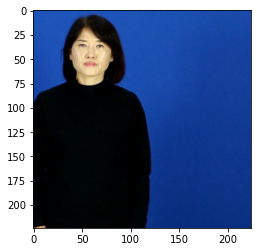

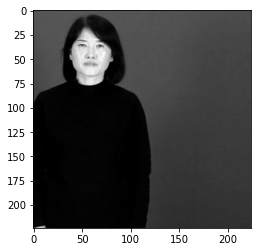

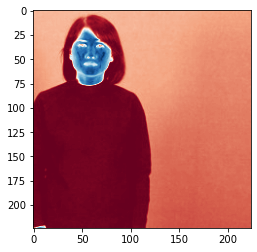

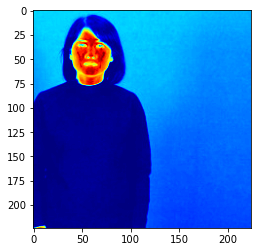

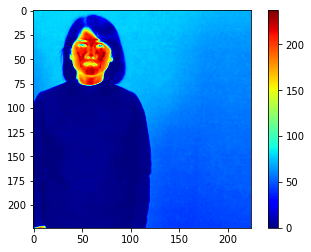

In [31]:
plt.imshow(image)
plt.show()



#이미지 흑백으로 열기
image_pil = Image.open(path).convert("L")
image_bw = np.array(image_pil)

plt.imshow(image_bw,'gray')
plt.show()


#이미지 red, blue로 열기
plt.imshow(image_bw,'RdBu')
plt.show()

#이미지 jet로 열기
plt.imshow(image_bw,'jet')
plt.show()

#color bar 추가하기
plt.imshow(image_bw,'jet')
plt.colorbar()
plt.show()